<p style="background-color:#fef0e9;font-family:newtimeroman;font-size:150%;color:#AF4343;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #AF4343;">Blinkit Customer Churn Analyisis <br/>Team Zesta @ IIT Guwahati Strategy Storm 2025  <br/> (PACE Strategy)</p>

<div align='center'> <img src="https://raw.githubusercontent.com/meafekih/links_kaggle/master/PACE.png" width="800"> </div>


In [1]:
from IPython.display import Markdown, display

def display_flowchart_mermaid(mermaid_code):
    display(Markdown(
        f"""
        ```mermaid
        {mermaid_code}
        ```
        """
    ))

# Define the flowchart using mermaid.js syntax for a circular process
mermaid_code = """
graph TD
    A(Plan) --> B(Analyse)
    B --> C(Construct)
    C --> D(Execute)
    D --> A
    style A fill:#f9f,stroke:#333,stroke-width:2px
    style B fill:#ccf,stroke:#333,stroke-width:2px
    style C fill:#aaf,stroke:#333,stroke-width:2px
    style D fill:#eea,stroke:#333,stroke-width:2px
"""

print("Here's the mermaid.js code for the circular flowchart:")
print(mermaid_code)

print("\nAnd here's the rendered circular flowchart:")
display_flowchart_mermaid(mermaid_code)

Here's the mermaid.js code for the circular flowchart:

graph TD
    A(Plan) --> B(Analyse)
    B --> C(Construct)
    C --> D(Execute)
    D --> A
    style A fill:#f9f,stroke:#333,stroke-width:2px
    style B fill:#ccf,stroke:#333,stroke-width:2px
    style C fill:#aaf,stroke:#333,stroke-width:2px
    style D fill:#eea,stroke:#333,stroke-width:2px


And here's the rendered circular flowchart:



        ```mermaid
        
graph TD
    A(Plan) --> B(Analyse)
    B --> C(Construct)
    C --> D(Execute)
    D --> A
    style A fill:#f9f,stroke:#333,stroke-width:2px
    style B fill:#ccf,stroke:#333,stroke-width:2px
    style C fill:#aaf,stroke:#333,stroke-width:2px
    style D fill:#eea,stroke:#333,stroke-width:2px

        ```
        

<div style="border-radius: 10px; border: 2px solid #DEB887; padding: 15px; font-size: 16px; text-align: left; font-family: 'Palatino Linotype', 'Book Antiqua', Palatino, serif;">
    
<p style="display: inline-block; padding: 7px; background-color: #fef0e9; color: #AF4343; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: center; border: 1px solid #AF4343; font-family: 'New Times Roman', serif;">-  Context-</p>
    
This analysis pertains to customer churn @ Blinkit via EDA, ML & DL methodologies to identify key factors leading to churn and develop strategies for reducing it.
    
    
<p style="display: inline-block; padding: 7px; background-color: #fef0e9; color: #AF4343; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: center; border: 1px solid #AF4343; font-family: 'New Times Roman', serif;">-  Target -</p>

- To identify the top three reasons for customer churn.
- To reduce customer churn rate by atleast 20% within 6 months.

 
 <p style="display: inline-block; padding: 7px; background-color: #fef0e9; color: #AF4343; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: center; border: 1px solid #AF4343; font-family: 'New Times Roman', serif;">-  Table of contents -</p>
    
    
[1. Plan (P)](#1) 
    
[2. Analyze (A)](#2) 
    
[3. Construct (C)](#3) 
    
[4. Execute (E)](#4) 

# <p id="1" style="background-color:#fef0e9;font-family:newtimeroman;font-size:150%;color:#AF4343;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #AF4343;">Plan (P)</p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/kaggle/input/dataset-churn-blinkit/Strategy Storm 2025 - Round 2 dataset - SSDataset.csv")
df.head()

UserID  CustomerAge     Sex  Tenure  ServiceUsageRate  SupportCalls  \
0       1           55    Male      20                24             4   
1       2           28    Male      27                30             4   
2       3           65  Female      60                17             7   
3       4           53    Male      47                16             8   
4       5           32    Male      56                 5             7   

   BillingDelay  PlanType AgreementDuration  TotalExpenditure  RecentActivity  \
0             6  Standard           Monthly               635              25   
1             5   Premium         Quarterly               631              10   
2            16   Premium         Quarterly               314               1   
3             7   Premium            Annual               527              13   
4            15   Premium            Annual               236              25   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             16093 non-null  int64 
 1   CustomerAge        16093 non-null  int64 
 2   Sex                16093 non-null  object
 3   Tenure             16093 non-null  int64 
 4   ServiceUsageRate   16093 non-null  int64 
 5   SupportCalls       16093 non-null  int64 
 6   BillingDelay       16093 non-null  int64 
 7   PlanType           16093 non-null  object
 8   AgreementDuration  16093 non-null  object
 9   TotalExpenditure   16093 non-null  int64 
 10  RecentActivity     16093 non-null  int64 
 11  Churn              16093 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
df.describe()

UserID  CustomerAge   Tenure  ServiceUsageRate  SupportCalls  \
count 16093.00     16093.00 16093.00          16093.00      16093.00   
mean   8047.00        42.03    32.11             15.09          5.40   
std    4645.79        13.85    17.09              8.82          3.12   
min       1.00        18.00     1.00              1.00          0.00   
25%    4024.00        30.00    18.00              7.00          3.00   
50%    8047.00        42.00    33.00             15.00          6.00   
75%   12070.00        54.00    47.00             23.00          8.00   
max   16093.00        65.00    60.00             30.00         10.00   

       BillingDelay  TotalExpenditure  RecentActivity    Churn  
count      16093.00          16093.00        16093.00 16093.00  
mean          17.07            542.27           15.53     0.47  
std            8.83            261.84            8.67     0.50  
min            0.00            100.00            1.00     0.00  
25%           10.00            314.00            8.00     0.00  
50%           18.00            534.00           16.00     0.00  
75%           25.00            772.00           23.00     1.00  
max           30.00           1000.00           30.00     1.00

# <p id="2" style="background-color:#fef0e9;font-family:newtimeroman;font-size:150%;color:#AF4343;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #AF4343;">Analyze (A)</p>

<div style="border-radius:10px;border:#c3d2bd solid;padding:15px; font-size:110%;text-align:left">
    
* **Objective**: Analyze the data and identify trends, patterns, and potential causes of customer churn.
    
    
 <p style="display: inline-block; padding: 7px; background-color: #d9ead3; color: #565d54; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #828c7e; font-family: 'New Times Roman', serif;">-  Dataset information    -</p>

* The dataset consists of Blinkit's 16k customer & their churn details, attained via IIT Guwahati.
    
 <p style="display: inline-block; padding: 7px; background-color: #d9ead3; color: #565d54; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #828c7e; font-family: 'New Times Roman', serif;">-  Data Exploration    -</p>

* Examine data for quality and completeness via AutoEDA tools, i.e. ydata_profiling & sweetviz.
* Perform initial data visualizations and descriptive statistics via profiling methodologies.
    
 <p style="display: inline-block; padding: 7px; background-color: #d9ead3; color: #565d54; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #828c7e; font-family: 'New Times Roman', serif;">-  Data Analysis    -</p>

* Use statistical techniques, machine learning & deep learning models to identify patterns & make predictions.
* Explore correlations between variables.
* Attain variable(feature) importance amongst themselves & when coupled together with other features.

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Blikit Churn Report")
profile.to_file("churn_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_notebook_iframe()

In [10]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 90.9 MB/s eta 0:00:00:00:0100:01


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_churn_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



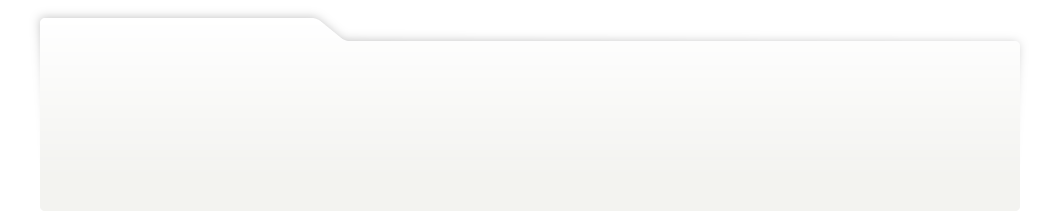
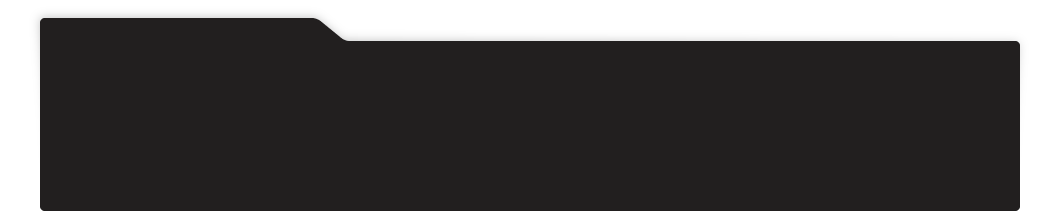
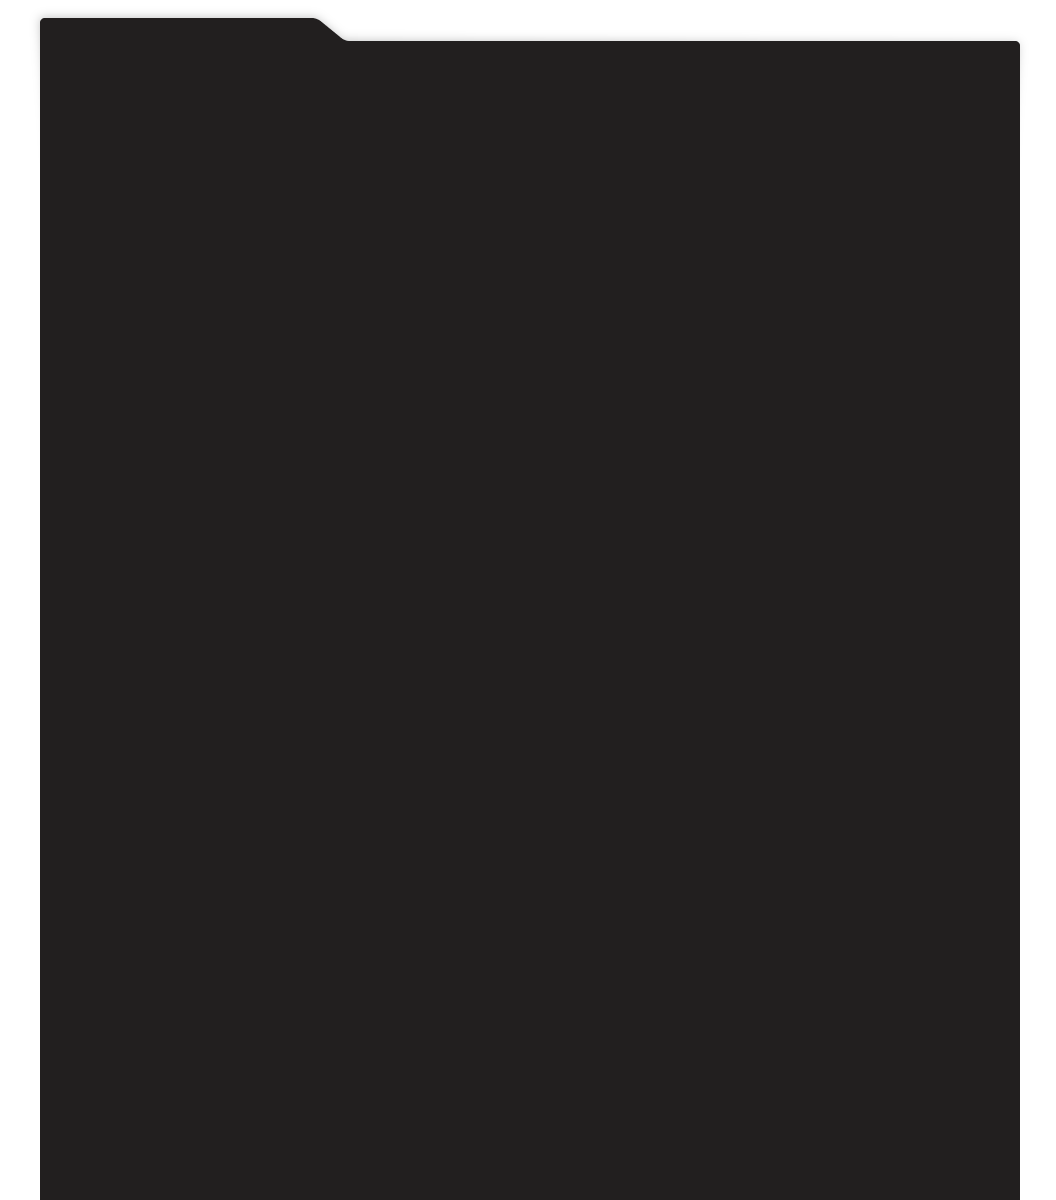
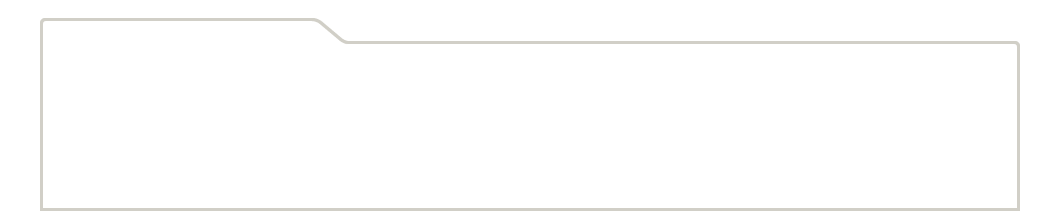
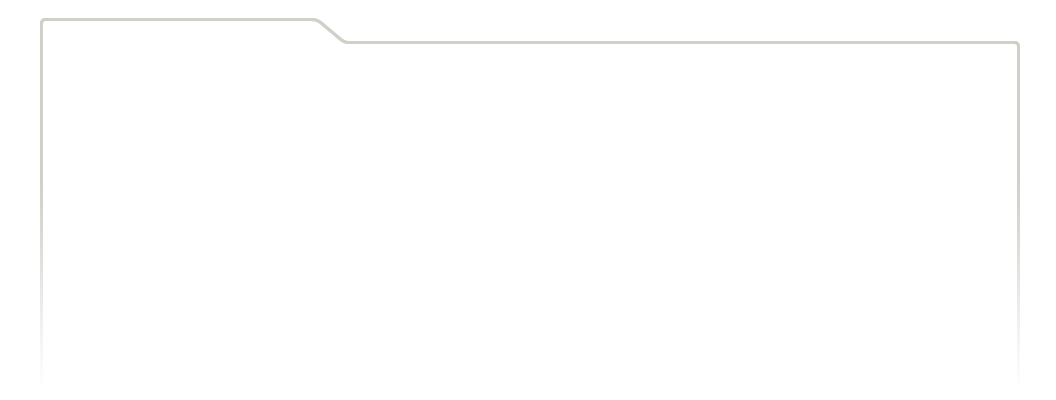
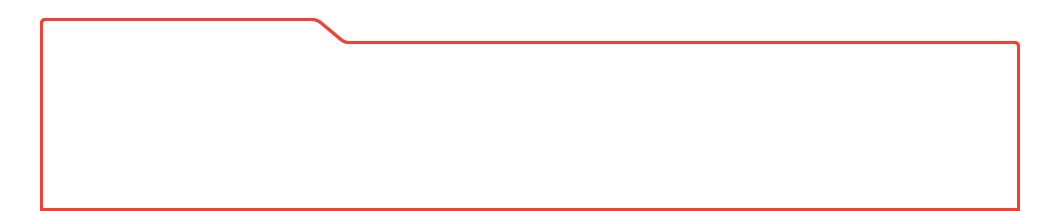
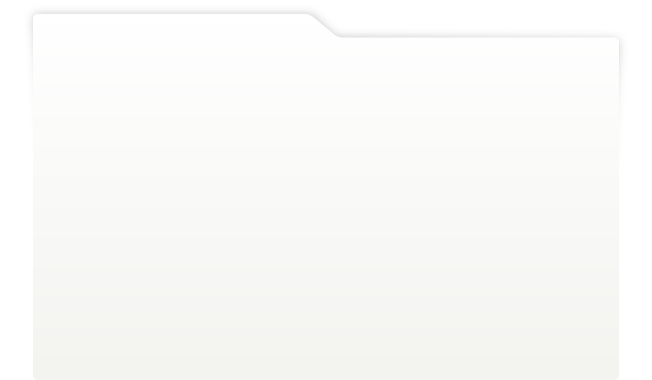
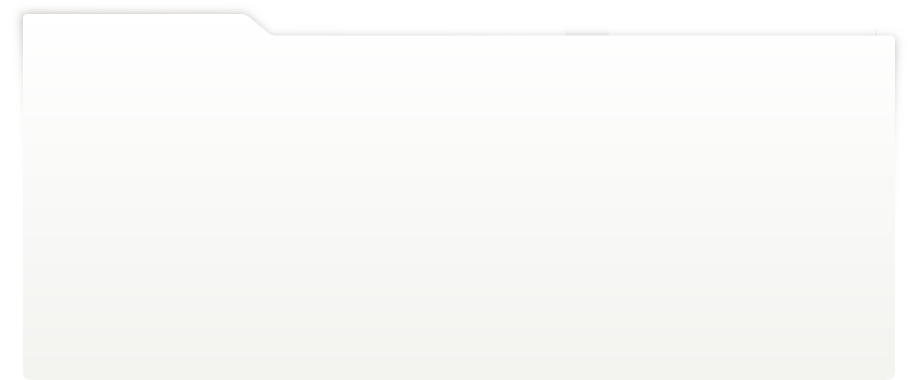
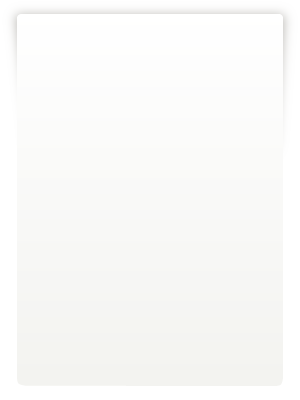
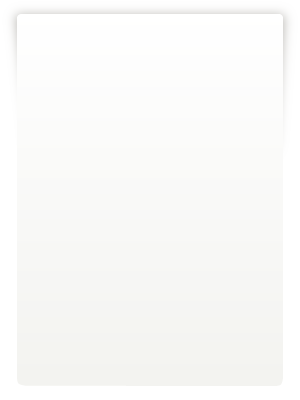
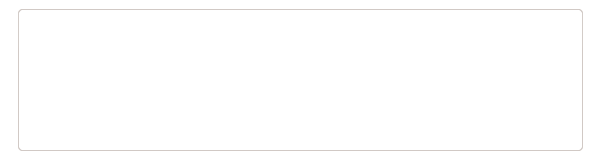
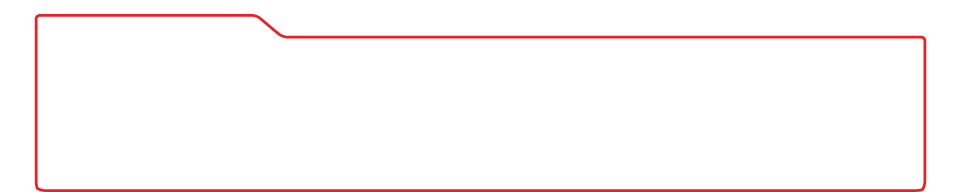
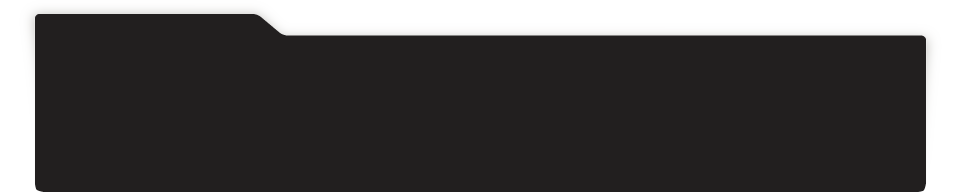
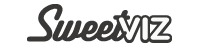
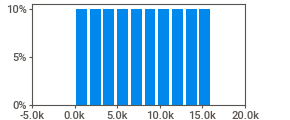
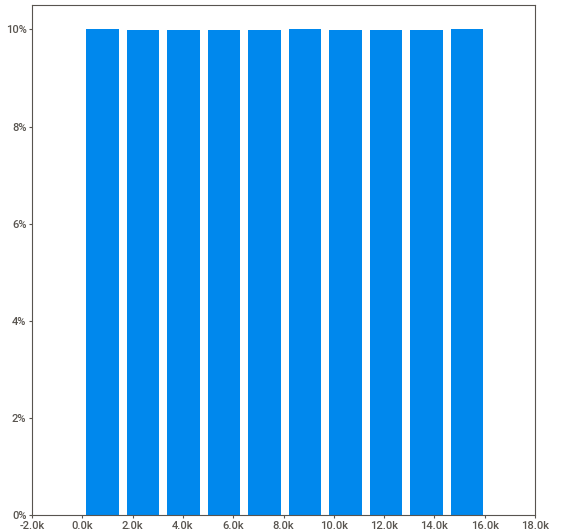
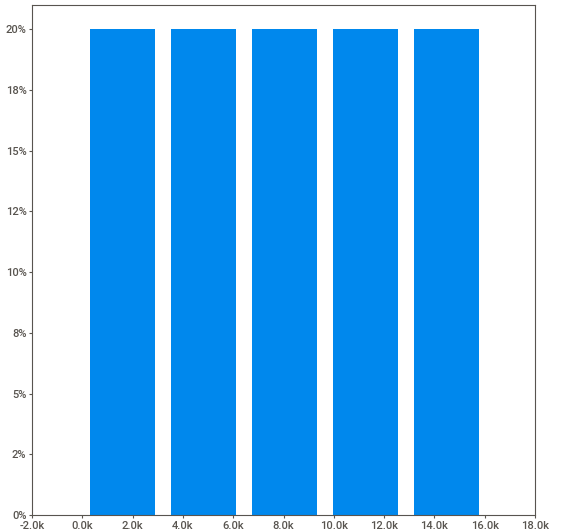
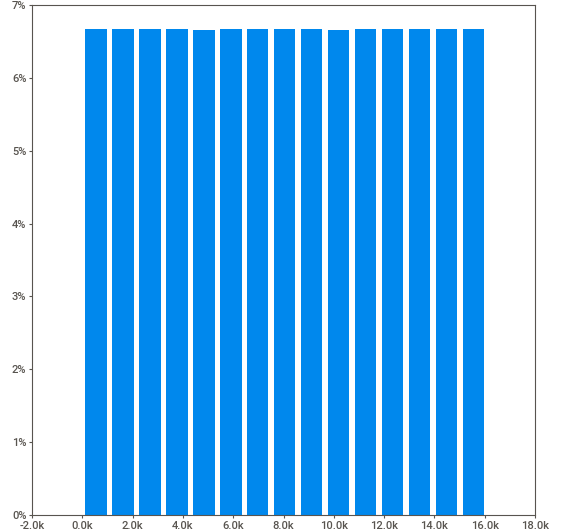
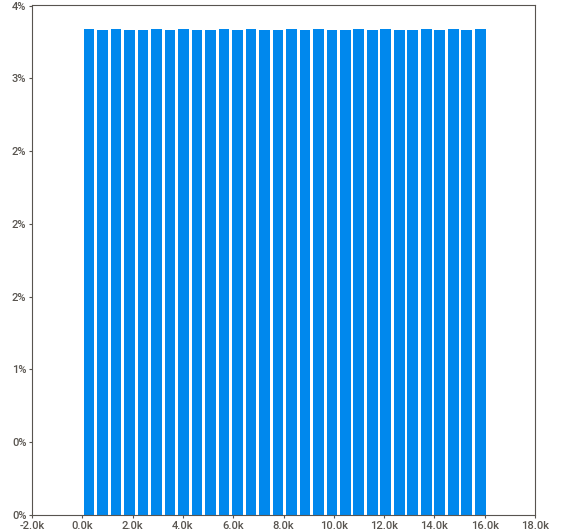
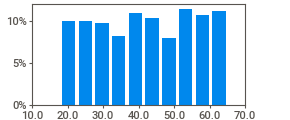
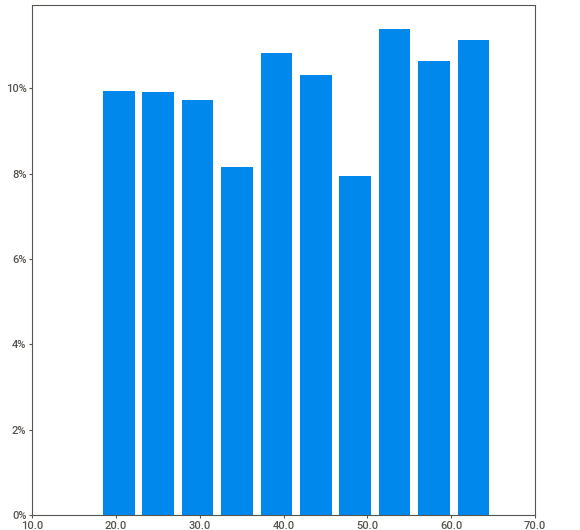
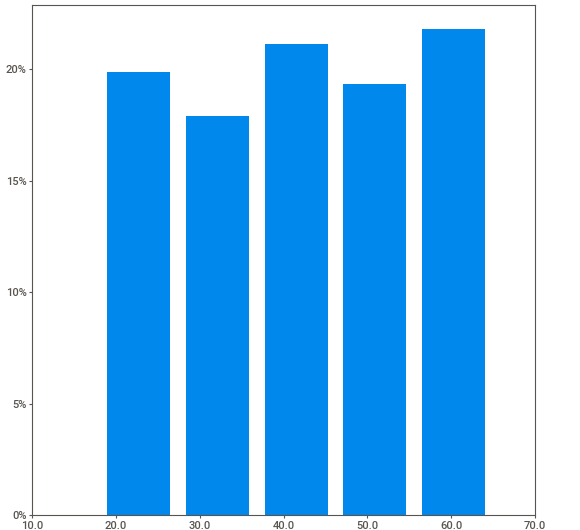
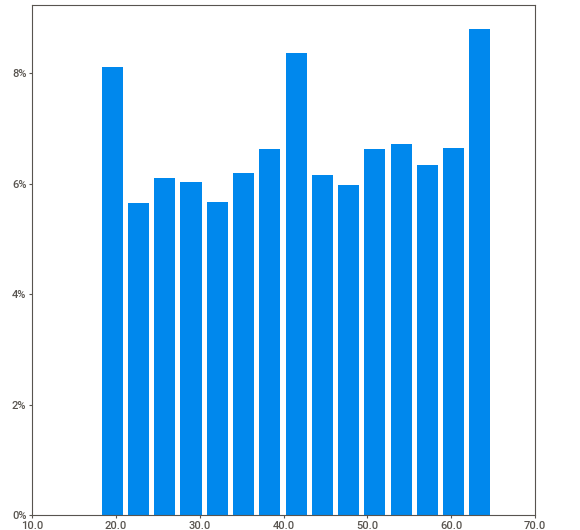
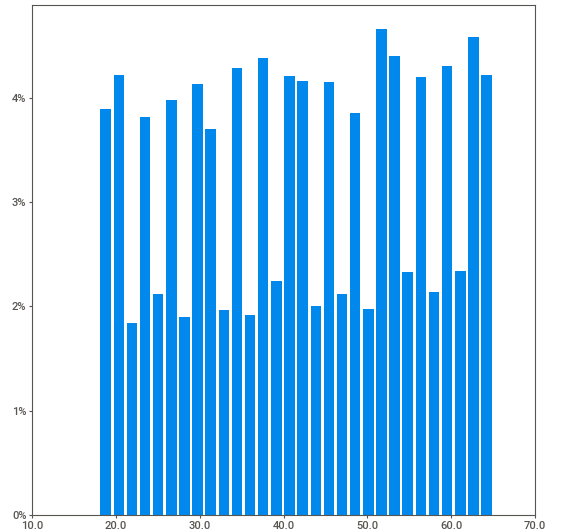
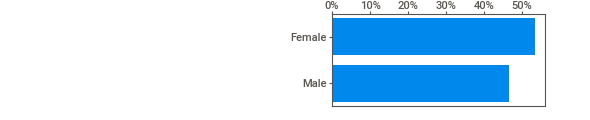
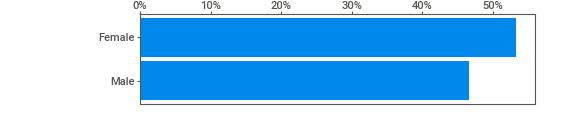
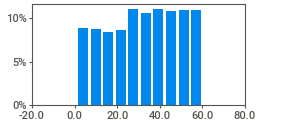
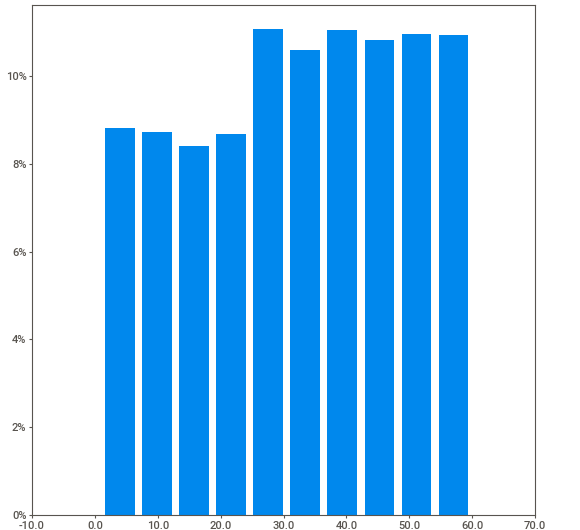
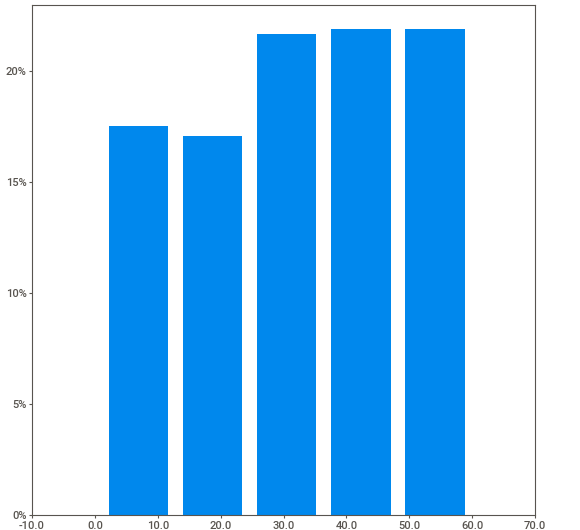
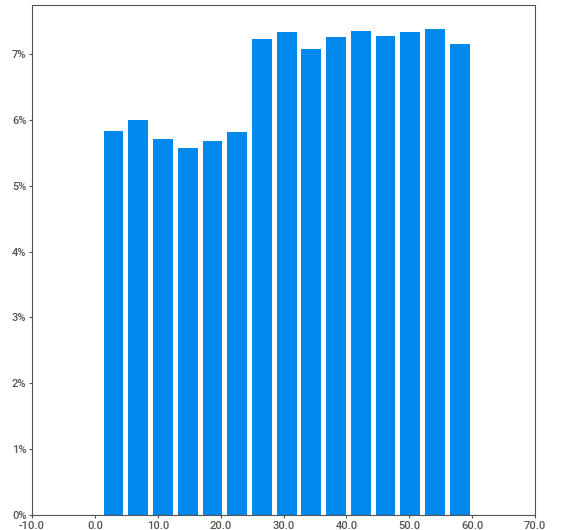
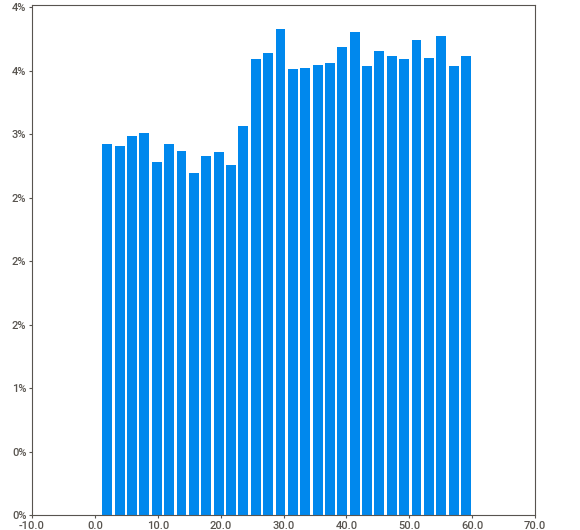
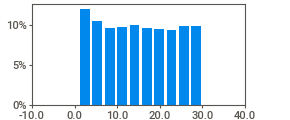
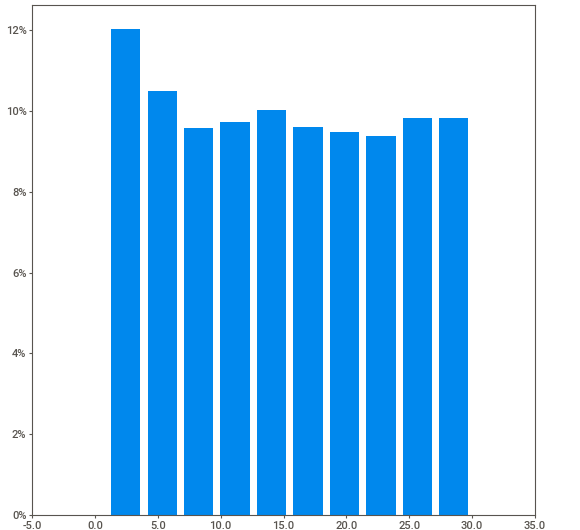
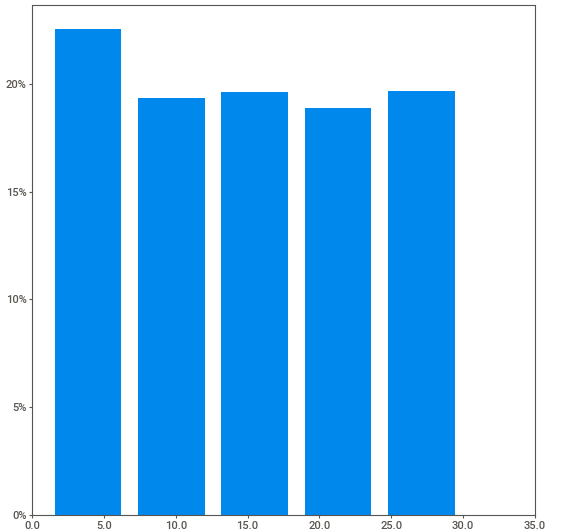
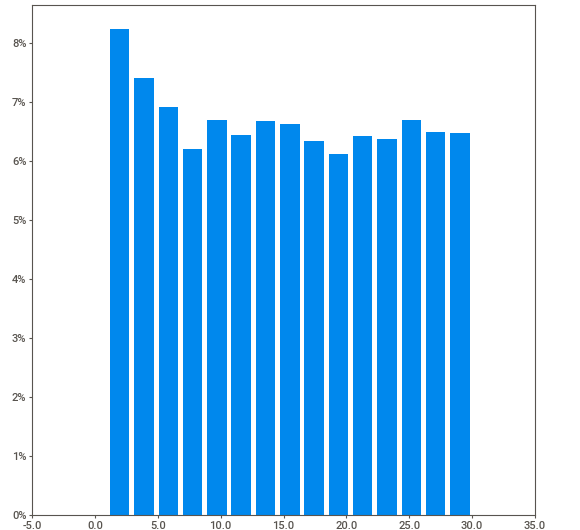
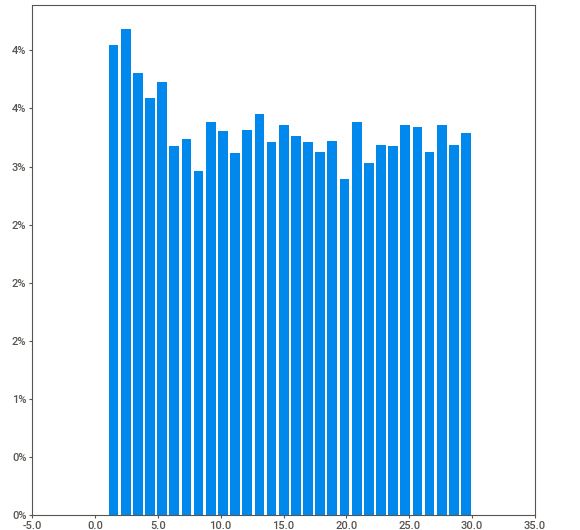
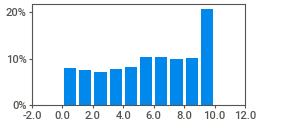
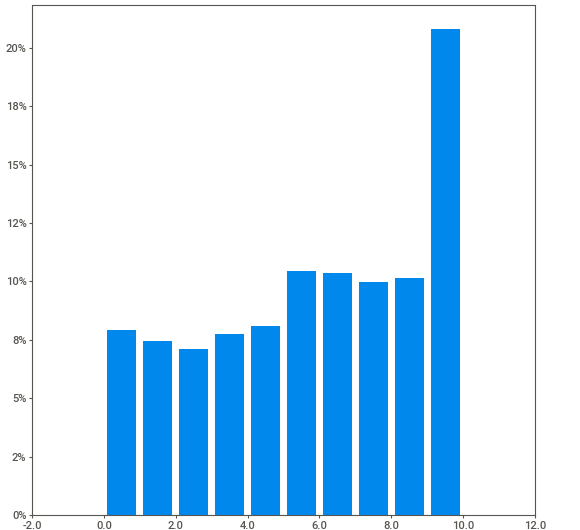
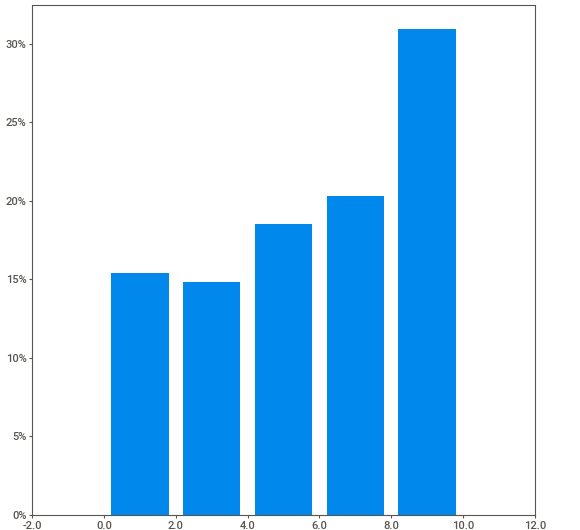
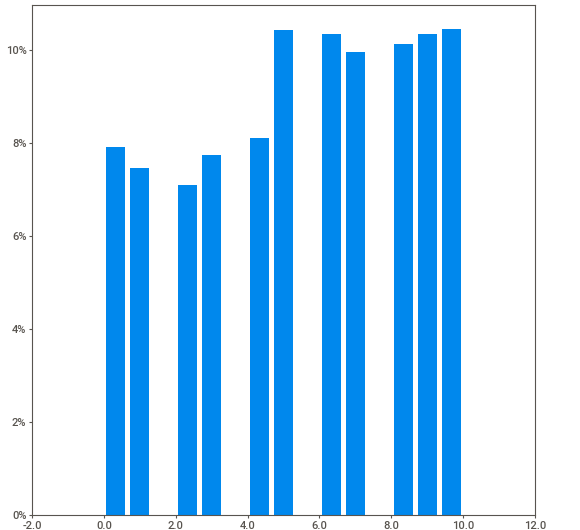
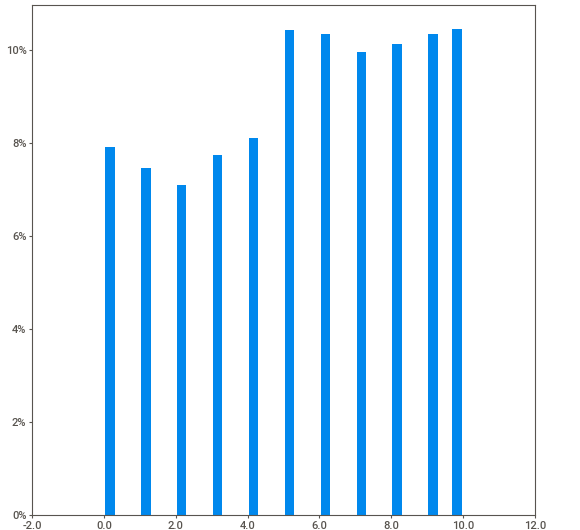
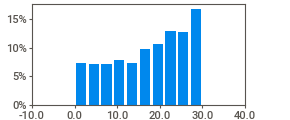
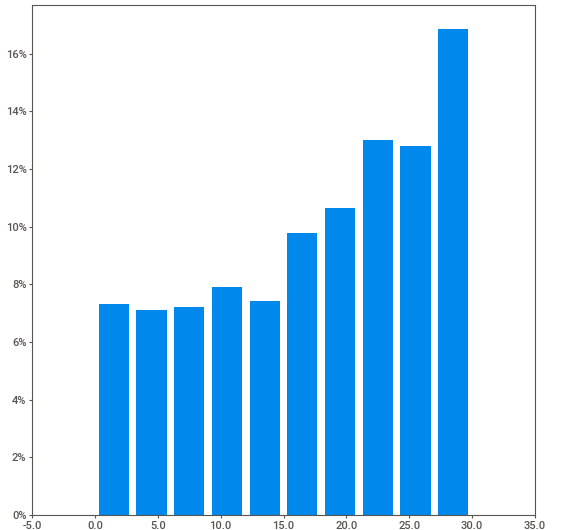
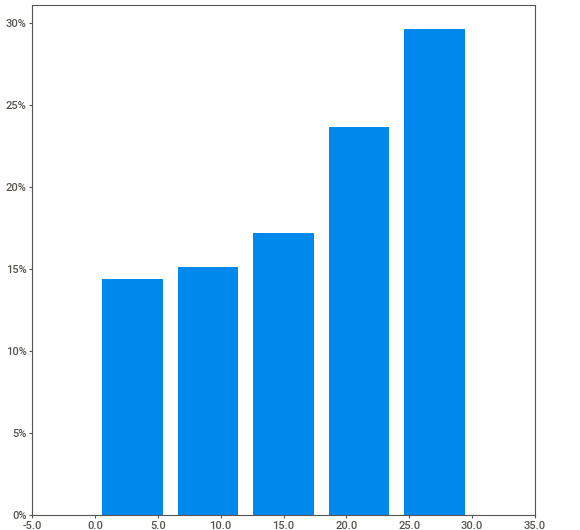
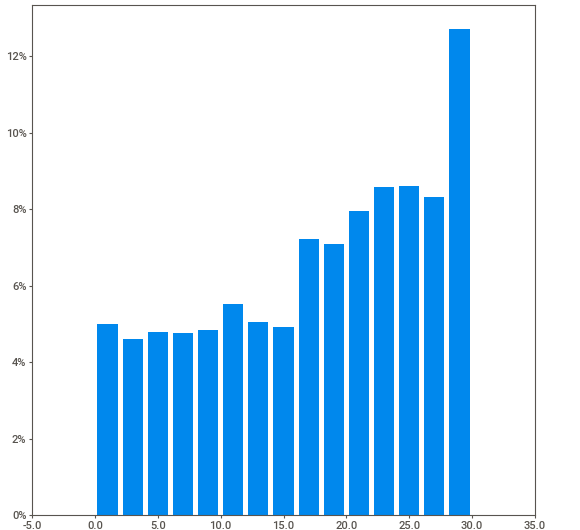
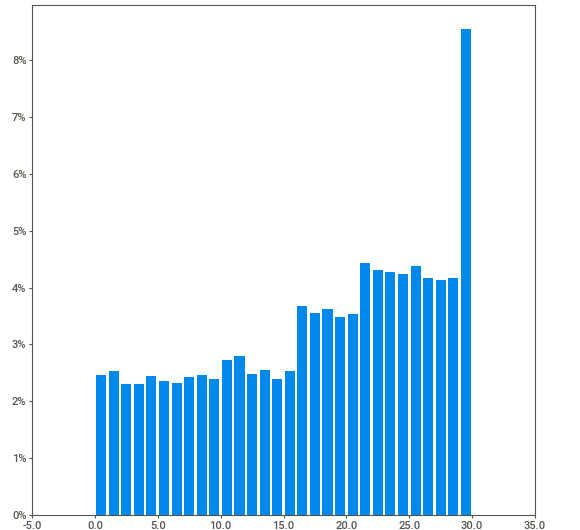
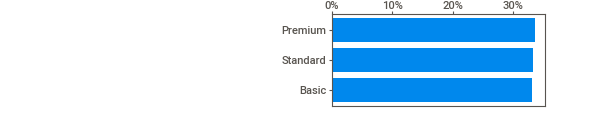
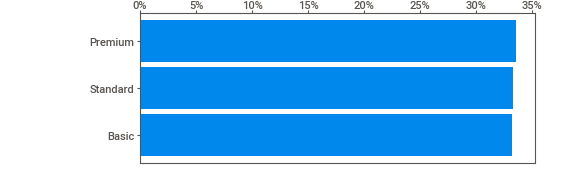
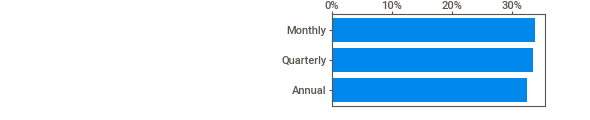
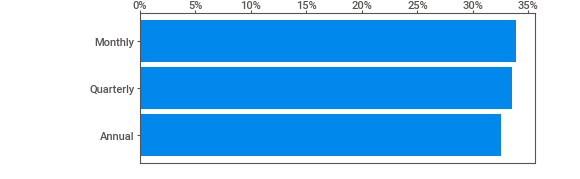
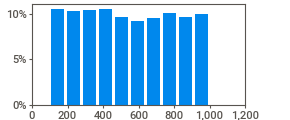
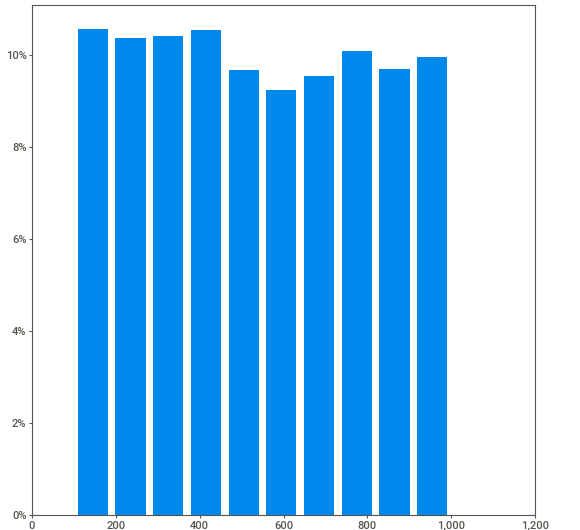
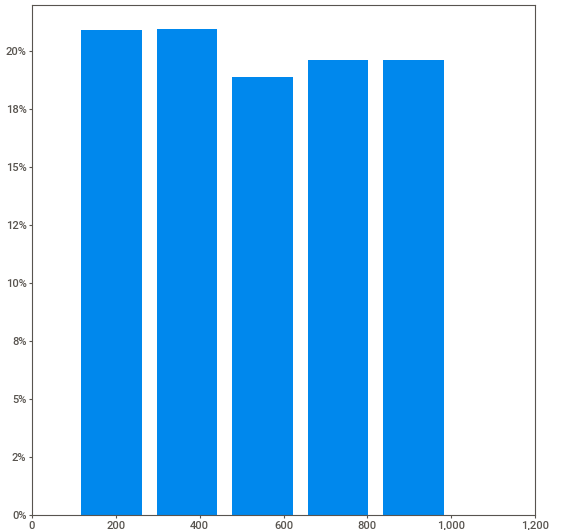
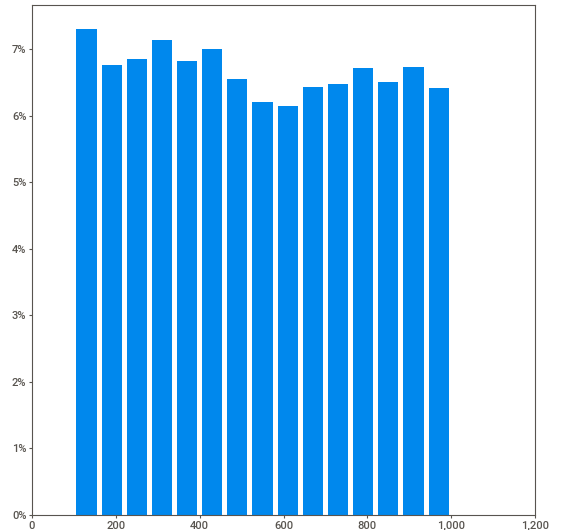
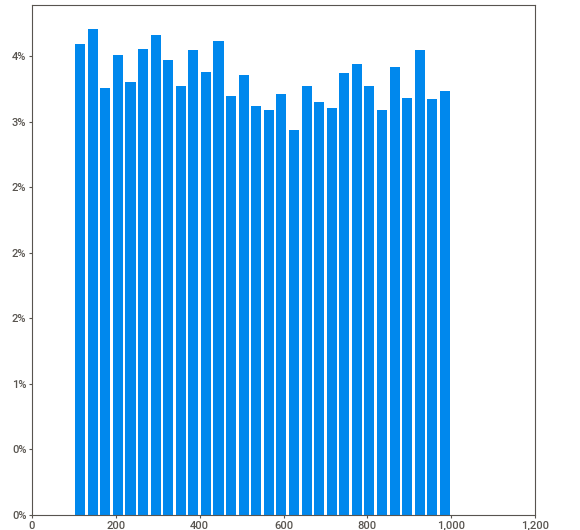
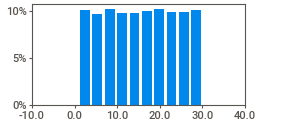
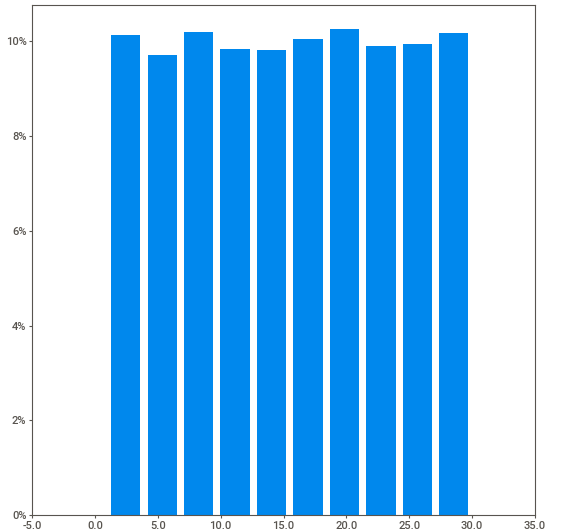
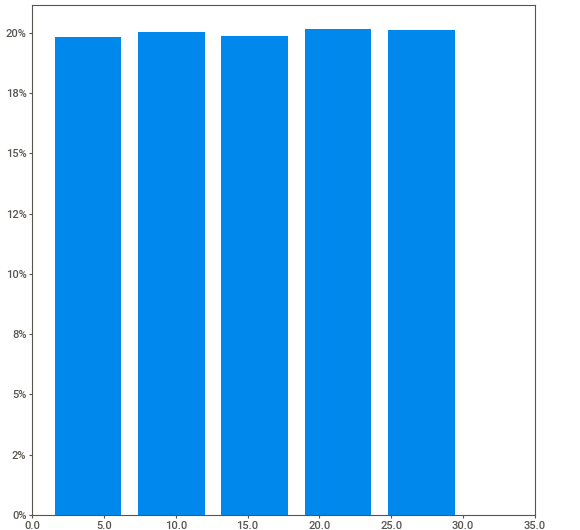
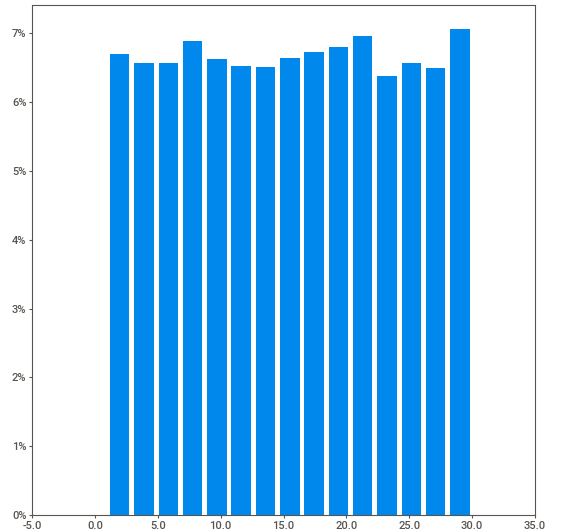
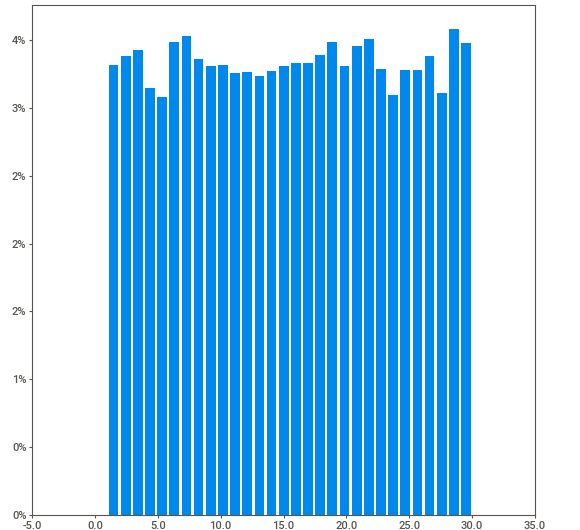
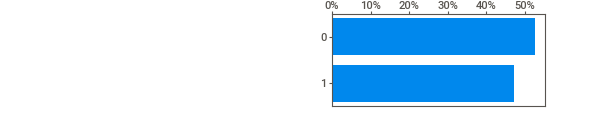
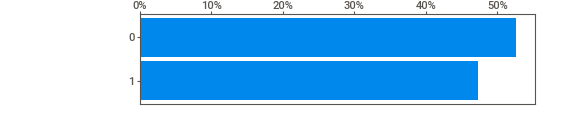
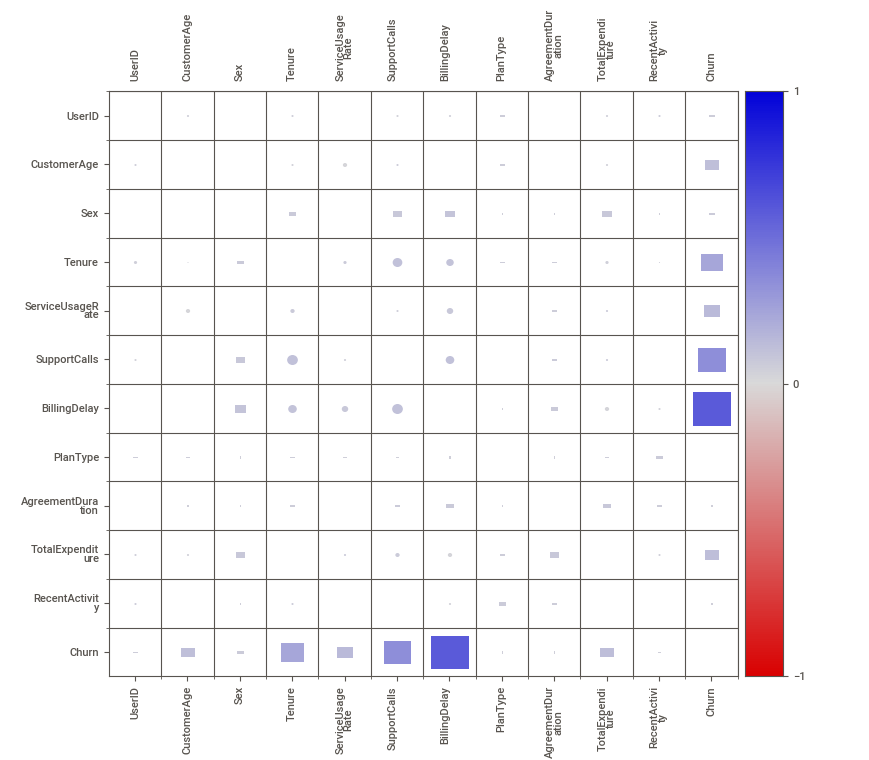
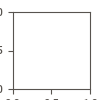

In [11]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("sweetviz_churn_report.html")
report.show_notebook()

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqiowh3dt
  JVM stdout: /tmp/tmpqiowh3dt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqiowh3dt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    2 months and 4 days
H2O_cluster_name:           H2O_from_python_unknownUser_atxa4x
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.250 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [13]:
from h2o.automl import H2OAutoML
churn_df = h2o.import_file('/kaggle/input/dataset-churn-blinkit/Strategy Storm 2025 - Round 2 dataset - SSDataset.csv')
churn_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:16093
Cols:12

UserID             CustomerAge         Sex     Tenure             ServiceUsageRate    SupportCalls        BillingDelay       PlanType    AgreementDuration    TotalExpenditure    RecentActivity      Churn
-------  -----------------  ------------------  ------  -----------------  ------------------  ------------------  -----------------  ----------  -------------------  ------------------  ------------------  -------------------
type     int                int                 enum    int                int                 int                 int                enum        enum                 int                 int                 int
mins     1.0                18.0                        1.0                1.0                 0.0                 0.0                                                 100.0               1.0                 0.0
mean     8047.0             42.02821102342632           32.11066923507116  15.092835394270802  5.39961473932766    17.07313738892686                                   542.2708631081834   15.533461753557443  0.47349779407195675
maxs     16093.0            65.0                        60.0               30.0                10.0                30.0                                                1000.0              30.0                1.0
sigma    4645.793276359449  13.852219734061977          17.09030549797719  8.82319111555765    3.1186763272285725  8.828505699253808                                   261.84191236046905  8.66811936014479    0.49931265265751407
zeros    0                  0                           0                  0                   1275                397                                                 0                   0                   8473
missing  0                  0                   0       0                  0                   0                   0                  0           0                    0                   0                   0
0        1.0                55.0                Male    20.0               24.0                4.0                 6.0                Standard    Monthly              635.0               25.0                0.0
1        2.0                28.0                Male    27.0               30.0                4.0                 5.0                Premium     Quarterly            631.0               10.0                0.0
2        3.0                65.0                Female  60.0               17.0                7.0                 16.0               Premium     Quarterly            314.0               1.0                 1.0
3        4.0                53.0                Male    47.0               16.0                8.0                 7.0                Premium     Annual               527.0               13.0                0.0
4        5.0                32.0                Male    56.0               5.0                 7.0                 15.0               Premium     Annual               236.0               25.0                0.0
5        6.0                60.0                Female  9.0                6.0                 9.0                 5.0                Premium     Quarterly            638.0               24.0                0.0
6        7.0                37.0                Male    1.0                28.0                6.0                 13.0               Premium     Annual               875.0               28.0                0.0
7        8.0                21.0                Male    59.0               7.0                 0.0                 7.0                Basic       Annual               814.0               15.0                0.0
8        9.0                26.0                Male    37.0               23.0                6.0                 25.0               Basic       Annual               541.0               29.0                1.0
9        10.0               65.0                Male    35.0               12.0                3.0                 0.0                Premium     Monthly         

In [14]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])
churn_train

UserID    CustomerAge  Sex       Tenure    ServiceUsageRate    SupportCalls    BillingDelay  PlanType    AgreementDuration      TotalExpenditure    RecentActivity    Churn
--------  -------------  ------  --------  ------------------  --------------  --------------  ----------  -------------------  ------------------  ----------------  -------
       1             55  Male          20                  24               4               6  Standard    Monthly                             635                25        0
       2             28  Male          27                  30               4               5  Premium     Quarterly                           631                10        0
       3             65  Female        60                  17               7              16  Premium     Quarterly                           314                 1        1
       4             53  Male          47                  16               8               7  Premium     Annual                              527                13        0
       7             37  Male           1                  28               6              13  Premium     Annual                              875                28        0
       9             26  Male          37                  23               6              25  Basic       Annual                              541                29        1
      10             65  Male          35                  12               3               0  Premium     Monthly                             476                11        0
      12             26  Female        55                   4               5              29  Standard    Quarterly                           918                28        1
      13             52  Female        14                  26               0              22  Basic       Annual                              425                24        1
      14             32  Female        37                  12               9              11  Standard    Monthly                             203                13        0
[11196 rows x 12 columns]

In [15]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("UserID")  # Remove "UserId"

In [16]:
aml = H2OAutoML(max_models = 20, seed = 1, verbosity="NULL", nfolds=0)

In [17]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20250106_230111_model_3


Model Summary: 
    number_of_trees
--  -----------------
    55

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.000810312796454462
RMSE: 0.028465993684648742
MAE: 0.013600476548017416
RMSLE: 0.022834064273009557
Mean Residual Deviance: 0.000810312796454462

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.0037983893884444495
RMSE: 0.06163107486036934
MAE: 0.023690163723566755
RMSLE: 0.044954690063205995
Mean Residual Deviance: 0.0037983893884444495

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2025-01-06 23:01:38  5.720 sec   0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2025-01-06 23:01:38  5.770 sec   5                  0.120849         0.100151        0.0146044            0.122685           0.100314          0.0150516
    2025-01-06 23:01:38  5.822 sec   10                 0.0691678        0.0319481       0.00478418           0.0756336          0.0333673         0.00572044
    2025-01-06 23:01:38  5.884 sec   15                 0.0533924        0.0204331       0.00285074           0.0640486          0.023337          0.00410222
    2025-01-06 23:01:38  5.943 sec   20                 0.0464844        0.0187408       0.0021608            0.0626853          0.023138          0.00392945
    2025-01-06 23:01:38  6.003 sec   25                 0.0425079        0.017677        0.00180692           0.0629453          0.0233685         0.00396211
    2025-01-06 23:01:39  6.075 sec   30                 0.0377566        0.0162068       0.00142556           0.061465           0.0228529         0.00377795
    2025-01-06 23:01:39  6.150 sec   35                 0.0358569        0.0156959       0.00128572           0.0618596          0.0231679         0.00382661
    2025-01-06 23:01:39  6.233 sec   40                 0.0339079        0.0152062       0.00114974           0.0617937          0.0233658         0.00381847
    2025-01-06 23:01:39  6.326 sec   45                 0.0318485        0.0146989       0.00101433           0.0616563          0.0235404         0.0038015
    2025-01-06 23:01:39  6.420 sec   50                 0.0298434        0.0140011       0.000890627          0.0616985          0.0234893         0.0038067
    2025-01-06 23:01:39  6.522 sec   55                 0.028466         0.0136005       0.000810313          0.0616311          0.0236902         0.00379839

Variable Importances: 
variable                     relative_importance    scaled_importance    percentage
---------------------------  ---------------------  -------------------  ------------
BillingDelay                 2419.08                1                    0.443302
SupportCalls                 733.728                0.303309             0.134458
Sex.Female                   544.133                0.224934             0.0997138
ServiceUsageRate             492.278                0.203498             0.0902111
Tenure                       467.48                 0.193247             0.0856668
CustomerAge                  283.631                0.117248             0.0519761
AgreementDuration.Monthly    253.6                  0.104833             0.0464728
TotalExpenditure             175.713                0.0726365            0.0321999
AgreementDuration.Annual     59.0385                0.0244054            0.010819
PlanType.Basic               19.2904                0.00797427           0.00353501
RecentActivity               4.49265                0.00185718           0.000823289
AgreementDuration.Quarterly  

In [18]:
lb = h2o.automl.get_leaderboard(aml)
lb.head(rows=lb.nrows)

model_id                                                   rmse         mse        mae      rmsle    mean_residual_deviance
----------------------------------------------------  ---------  ----------  ---------  ---------  ------------------------
XGBoost_grid_1_AutoML_1_20250106_230111_model_3       0.0616311  0.00379839  0.0236902  0.0449547                0.00379839
GBM_3_AutoML_1_20250106_230111                        0.0657619  0.00432463  0.0360988  0.0495971                0.00432463
GBM_2_AutoML_1_20250106_230111                        0.0678082  0.00459796  0.038043   0.0504255                0.00459796
GBM_4_AutoML_1_20250106_230111                        0.0721405  0.00520425  0.0421046  0.0547587                0.00520425
XGBoost_grid_1_AutoML_1_20250106_230111_model_2       0.0722862  0.00522529  0.0442014  0.0539799                0.00522529
GBM_5_AutoML_1_20250106_230111                        0.0751511  0.00564769  0.0414076  0.0562809                0.00564769
XGBoost_grid_1_AutoML_1_20250106_230111_model_1       0.078462   0.00615628  0.0469092  0.0579568                0.00615628
DRF_1_AutoML_1_20250106_230111                        0.0813246  0.00661368  0.0369401  0.0598535                0.00661368
XGBoost_1_AutoML_1_20250106_230111                    0.0818925  0.00670638  0.0529348  0.0599585                0.00670638
GBM_1_AutoML_1_20250106_230111                        0.0922322  0.00850679  0.0522705  0.0668833                0.00850679
XGBoost_2_AutoML_1_20250106_230111                    0.0937189  0.00878323  0.0553031  0.0704276                0.00878323
XGBoost_3_AutoML_1_20250106_230111                    0.095323   0.00908648  0.0586816  0.0728065                0.00908648
GBM_grid_1_AutoML_1_20250106_230111_model_2           0.118023   0.0139294   0.0729815  0.0865244                0.0139294
XRT_1_AutoML_1_20250106_230111                        0.127331   0.0162131   0.069552   0.0921301                0.0162131
DeepLearning_grid_3_AutoML_1_20250106_230111_model_1  0.166073   0.0275804   0.0994043  0.117491                 0.0275804
DeepLearning_grid_2_AutoML_1_20250106_230111_model_1  0.178905   0.0320071   0.111507   0.127076                 0.0320071
GBM_grid_1_AutoML_1_20250106_230111_model_1           0.224367   0.0503406   0.179056   0.167166                 0.0503406
DeepLearning_grid_1_AutoML_1_20250106_230111_model_1  0.230842   0.053288    0.16095    0.166079                 0.053288
DeepLearning_1_AutoML_1_20250106_230111               0.261222   0.0682371   0.156031   0.183333                 0.0682371
GLM_1_AutoML_1_20250106_230111                        0.372254   0.138573    0.309669   0.269159                 0.138573
[20 rows x 6 columns]

In [19]:
churn_pred=aml.leader.predict(churn_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [20]:
churn_test.head()['Churn']

Churn
-------
      0
      0
      1
      0
      1
      1
      0
      1
      1
      1
[10 rows x 1 column]

In [21]:
churn_pred.head()

predict
------------
-0.000444074
 0.00126387
 0.989936
-0.00681125
 0.988864
 1.00128
-0.0200797
 0.988916
 0.833026
 0.226904
[10 rows x 1 column]

In [22]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


['XGBoost_grid_1_AutoML_1_20250106_230111_model_3',
 'GBM_3_AutoML_1_20250106_230111',
 'GBM_2_AutoML_1_20250106_230111',
 'GBM_4_AutoML_1_20250106_230111',
 'XGBoost_grid_1_AutoML_1_20250106_230111_model_2',
 'GBM_5_AutoML_1_20250106_230111',
 'XGBoost_grid_1_AutoML_1_20250106_230111_model_1',
 'DRF_1_AutoML_1_20250106_230111',
 'XGBoost_1_AutoML_1_20250106_230111',
 'GBM_1_AutoML_1_20250106_230111',
 'XGBoost_2_AutoML_1_20250106_230111',
 'XGBoost_3_AutoML_1_20250106_230111',
 'GBM_grid_1_AutoML_1_20250106_230111_model_2',
 'XRT_1_AutoML_1_20250106_230111',
 'DeepLearning_grid_3_AutoML_1_20250106_230111_model_1',
 'DeepLearning_grid_2_AutoML_1_20250106_230111_model_1',
 'GBM_grid_1_AutoML_1_20250106_230111_model_1',
 'DeepLearning_grid_1_AutoML_1_20250106_230111_model_1',
 'DeepLearning_1_AutoML_1_20250106_230111',
 'GLM_1_AutoML_1_20250106_230111']

In [23]:
out=h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20250106_230111_model_3


Model Summary: 
    number_of_trees
--  -----------------
    55

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.000810312796454462
RMSE: 0.028465993684648742
MAE: 0.013600476548017416
RMSLE: 0.022834064273009557
Mean Residual Deviance: 0.000810312796454462

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.0037983893884444495
RMSE: 0.06163107486036934
MAE: 0.023690163723566755
RMSLE: 0.044954690063205995
Mean Residual Deviance: 0.0037983893884444495

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2025-01-06 23:01:38  5.720 sec   0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2025-01-06 23:01:38  5.770 sec   5                  0.120849         0.100151        0.0146044            0.122685           0.100314          0.0150516
    2025-01-06 23:01:38  5.822 sec   10                 0.0691678        0.0319481       0.00478418           0.0756336          0.0333673         0.00572044
    2025-01-06 23:01:38  5.884 sec   15                 0.0533924        0.0204331       0.00285074           0.0640486          0.023337          0.00410222
    2025-01-06 23:01:38  5.943 sec   20                 0.0464844        0.0187408       0.0021608            0.0626853          0.023138          0.00392945
    2025-01-06 23:01:38  6.003 sec   25                 0.0425079        0.017677        0.00180692           0.0629453          0.0233685         0.00396211
    2025-01-06 23:01:39  6.075 sec   30                 0.0377566        0.0162068       0.00142556           0.061465           0.0228529         0.00377795
    2025-01-06 23:01:39  6.150 sec   35                 0.0358569        0.0156959       0.00128572           0.0618596          0.0231679         0.00382661
    2025-01-06 23:01:39  6.233 sec   40                 0.0339079        0.0152062       0.00114974           0.0617937          0.0233658         0.00381847
    2025-01-06 23:01:39  6.326 sec   45                 0.0318485        0.0146989       0.00101433           0.0616563          0.0235404         0.0038015
    2025-01-06 23:01:39  6.420 sec   50                 0.0298434        0.0140011       0.000890627          0.0616985          0.0234893         0.0038067
    2025-01-06 23:01:39  6.522 sec   55                 0.028466         0.0136005       0.000810313          0.0616311          0.0236902         0.00379839

Variable Importances: 
variable                     relative_importance    scaled_importance    percentage
---------------------------  ---------------------  -------------------  ------------
BillingDelay                 2419.08                1                    0.443302
SupportCalls                 733.728                0.303309             0.134458
Sex.Female                   544.133                0.224934             0.0997138
ServiceUsageRate             492.278                0.203498             0.0902111
Tenure                       467.48                 0.193247             0.0856668
CustomerAge                  283.631                0.117248             0.0519761
AgreementDuration.Monthly    253.6                  0.104833             0.0464728
TotalExpenditure             175.713                0.0726365            0.0321999
AgreementDuration.Annual     59.0385                0.0244054            0.010819
PlanType.Basic               19.2904                0.00797427           0.00353501
RecentActivity               4.49265                0.00185718           0.000823289
AgreementDuration.Quarterly  

In [24]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_grid_1_AutoML_1_20250106_230111_model_3',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_grid_1_AutoML_1_20250106_230111_model_3'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250106_230111_training_py_2_sid_b89f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250106_230111_training_py_2_sid_b89f'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250106_230111_training_py_2_sid_b89f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250106_230111_training_py_2_sid_b89f'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name'

In [25]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'min_child_weight': 5.0,
  'normalize_type': 'tree',
  'eta': 0.3,
  'objective': 'reg:squarederror',
  'silent': True,
  'nthread': 4,
  'seed': 3,
  'colsample_bylevel': 1.0,
  'rate_drop': 0.0,
  'max_bin': 256,
  'one_drop': '0',
  'sample_type': 'uniform',
  'max_depth': 6,
  'lambda': 0.1,
  'colsample_bytree': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.001,
  'booster': 'dart',
  'grow_policy': 'depthwise',
  'skip_drop': 0.0,
  'nround': 10000,
  'max_delta_step': 0.0,
  'subsample': 1.0,
  'tree_method': 'gpu_hist'},
 55)

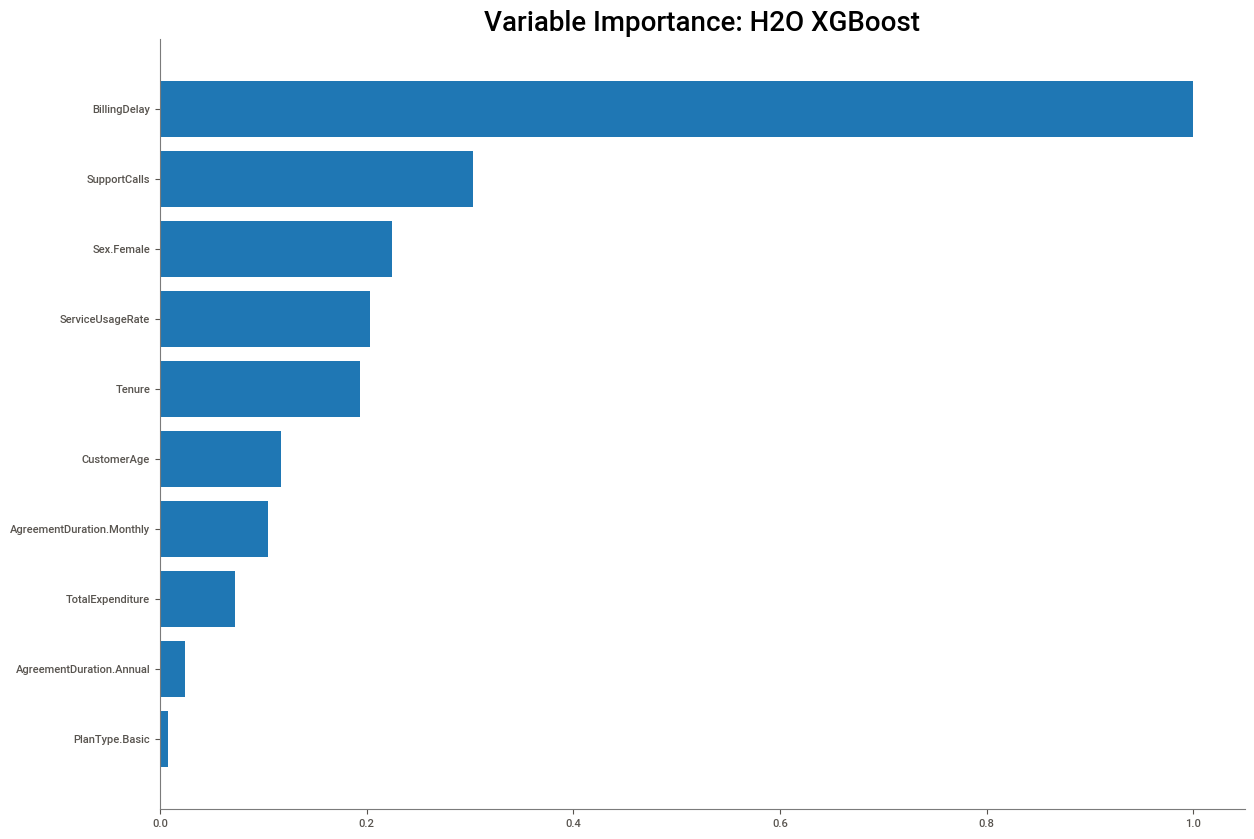

<Figure size 640x480 with 0 Axes>

In [26]:
out.varimp_plot()

In [28]:
out2=h2o.get_model([mid for mid in model_ids if "DeepLearning" in mid][0])
out2

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_1_20250106_230111_model_1


Status of Neuron Layers: predicting Churn, regression, gaussian distribution, Quadratic loss, 22,201 weights/biases, 271.9 KB, 2,299,822 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  -----------------------
    1        18       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.16817563951265482   0.38254809379577637    0.0         -0.049612609543627416  0.18861442804336548  0.010120672464752442  0.24710190296173096
    3        100      RectifierDropout  10.0       0.0   0.0   0.005167749960500077  0.006783386692404747   0.0         -0.06021526010083107   0.1485426425933838   0.3847655830684444    0.40529513359069824
    4        100      RectifierDropout  10.0       0.0   0.0   0.017431439186741046  0.057418644428253174   0.0         -0.039907799285983786  0.12420874834060669  -0.08591323129120652  0.3003714084625244
    5        1        Linear                       0.0   0.0   0.002279646949027665  0.0018693627789616585  0.0         -0.08178926549036987   0.34272027015686035  0.5791950831189593    1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.022833917672312156
RMSE: 0.15110895960303664
MAE: 0.09168660863900184
RMSLE: 0.10655645734602451
Mean Residual Deviance: 0.022833917672312156

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.02758040694034709
RMSE: 0.16607349860934192
MAE: 0.0994043216149147
RMSLE: 0.11749140722792509
Mean Residual Deviance: 0.02758040694034709

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2    validation_rmse    validation_deviance    validation_mae    validation_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------  -----------------  ---------------------  ----------------  ---------------
    2025-01-06 23:04:11  0.000 sec                           0         0             0            nan              nan                  nan             nan            nan                nan                    nan               nan
    2025-01-06 23:04:19  7.981 sec         12848 obs/sec     8.92864   1             99965        0.24989          0.0624452            0.150427        0.749713       0.268912           0.0723138              0.162143          0.709417
    2025-01-06 23:04:24  13.581 sec        15139 obs/sec     17.8612   2             199974       0.219043         0.04798              0.12155         0.807691       0.235748           0.0555769              0.130836          0.776672
    2025-01-06 23:04:30  18.749 sec        16466 obs/sec     26.7933   3             299978       0.200892         0.0403578            0.114095        0.838242       0.215149           0.046289               0.121514          0.813994
    2025-01-06 23:04:39  28.217 sec        18166 obs/sec     44.6608   5             500022       0.182133         0.0331723            0.0967569       0.867042       0.196209           0.0384982              0.105129          0.845301
    2025-01-06 23:04:48  36.903 sec        19441 obs/sec     62.5156   7             699925       0.177306         0.0314375            0.102585        0.873995       0.192152           0.0369225              0.110807          0.851632
    2025-01-06 23:04:56  45.381 sec        20316 obs/sec     80

In [29]:
out2.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_3_AutoML_1_20250106_230111_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_3_AutoML_1_20250106_230111_model_1'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250106_230111_training_py_2_sid_b89f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250106_230111_training_py_2_sid_b89f'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250106_230111_training_py_2_sid_b89f',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250106_230111_training_py_2_sid_b89f'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sc

In [30]:
def convert_H2ODeepLearningParams_2_DeepLearningParams(h2o_params):
    dl_params = {}

    # Map H2O Deep Learning parameters to general Deep Learning framework parameters
    if 'activation' in h2o_params:
        dl_params['activation'] = h2o_params['activation']

    if 'hidden' in h2o_params:
        dl_params['hidden_layers'] = h2o_params['hidden']

    if 'epochs' in h2o_params:
        dl_params['epochs'] = h2o_params['epochs']

    if 'train_samples_per_iteration' in h2o_params:
        dl_params['batch_size'] = h2o_params['train_samples_per_iteration']

    if 'rate' in h2o_params:
        dl_params['learning_rate'] = h2o_params['rate']

    if 'rate_annealing' in h2o_params:
        dl_params['learning_rate_decay'] = h2o_params['rate_annealing']

    if 'l1' in h2o_params:
        dl_params['l1_regularization'] = h2o_params['l1']

    if 'l2' in h2o_params:
        dl_params['l2_regularization'] = h2o_params['l2']

    if 'momentum_stable' in h2o_params:
        dl_params['momentum'] = h2o_params['momentum_stable']

    if 'rho' in h2o_params:
        dl_params['rho'] = h2o_params['rho']

    if 'epsilon' in h2o_params:
        dl_params['epsilon'] = h2o_params['epsilon']

    if 'max_w2' in h2o_params:
        dl_params['max_weight'] = h2o_params['max_w2']

    if 'initial_weight_distribution' in h2o_params:
        dl_params['weight_init'] = h2o_params['initial_weight_distribution']

    if 'initial_weight_scale' in h2o_params:
        dl_params['weight_scale'] = h2o_params['initial_weight_scale']

    if 'loss' in h2o_params:
        dl_params['loss_function'] = h2o_params['loss']

    if 'stopping_metric' in h2o_params:
        dl_params['early_stopping_metric'] = h2o_params['stopping_metric']

    if 'stopping_rounds' in h2o_params:
        dl_params['early_stopping_rounds'] = h2o_params['stopping_rounds']

    if 'stopping_tolerance' in h2o_params:
        dl_params['early_stopping_tolerance'] = h2o_params['stopping_tolerance']

    if 'score_interval' in h2o_params:
        dl_params['validation_freq'] = h2o_params['score_interval']

    # Return the converted parameters as a DataFrame
    return pd.DataFrame.from_dict(dl_params, orient='index')


converted_params = convert_H2ODeepLearningParams_2_DeepLearningParams(out2.params)
converted_params

default  \
activation                                                Rectifier   
hidden_layers                                            [200, 200]   
epochs                                                        10.00   
batch_size                                                       -2   
learning_rate                                                  0.01   
learning_rate_decay                                            0.00   
l1_regularization                                              0.00   
l2_regularization                                              0.00   
momentum                                                       0.00   
rho                                                            0.99   
epsilon                                                        0.00   
max_weight               340282349999999991754788743781432688640.00   
weight_init                                         UniformAdaptive   
weight_scale                                                   1.00   
loss_function                                             Automatic   
early_stopping_metric                                          AUTO   
early_stopping_rounds                                             5   
early_stopping_tolerance                                       0.00   
validation_freq                                                5.00   

                                                             actual  \
activation                                     RectifierWithDropout   
hidden_layers                                       [100, 100, 100]   
epochs                                                     10000.00   
batch_size                                                       -2   
learning_rate                                                  0.01   
learning_rate_decay                                            0.00   
l1_regularization                                              0.00   
l2_regularization                                              0.00   
momentum                                                       0.00   
rho                                                            0.90   
epsilon                                                        0.00   
max_weight               340282349999999991754788743781432688640.00   
weight_init                                         UniformAdaptive   
weight_scale                                                   1.00   
loss_function                                             Automatic   
early_stopping_metric                                      deviance   
early_stopping_rounds                                             3   
early_stopping_tolerance                                       0.01   
validation_freq                                                5.00   

                                                              input  
activation                                     RectifierWithDropout  
hidden_layers                                       [100, 100, 100]  
epochs                                                     10000.00  
batch_size                                                       -2  
learning_rate                                                  0.01  
learning_rate_decay                                            0.00  
l1_regularization                                              0.00  
l2_regularization                                              0.00  
momentum                                                       0.00  
rho                                                            0.90  
epsilon                                                        0.00  
max_weight               340282349999999991754788743781432688640.00  
weight_init                                         UniformAdaptive  
weight_scale                                                   1.00  
loss_function                                             Automatic  
early_stopping_metric                                      deviance  
early_stopping_rounds       

# <p id="3" style="background-color:#fef0e9;font-family:newtimeroman;font-size:150%;color:#AF4343;text-align:center;border-radius:15px 50px;padding:7px;border:solid 3px #AF4343;">Construct (C)</p>


<div style="border-radius:10px;border:#c3d2bd solid;padding:15px;font-size:110%;text-align:left">
    
* **Objective**: Construct solutions and strategies to address the identified causes of churn.
    
    
 <p style="display: inline-block; padding: 7px; background-color: #d9ead3; color: #565d54; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #828c7e; font-family: 'New Times Roman', serif;">-  Feature Engineering    -</p>

* Create relevant features from the data for modeling.
    

    
 <p style="display: inline-block; padding: 7px; background-color: #d9ead3; color: #565d54; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #828c7e; font-family: 'New Times Roman', serif;">-  Model Building    -</p>

* Develop predictive models for customer churn.
* Evaluate and fine-tune models (e.g., logistic regression, decision trees).

    
 <p style="display: inline-block; padding: 7px; background-color: #d9ead3; color: #565d54; text-decoration: none; border-radius: 5px 5px; font-size: 150%; text-align: left; border: 1.5px solid #828c7e; font-family: 'New Times Roman', serif;">-  Recommendations    -</p>

* Based on model insights, construct actionable recommendations for reducing churn.
    
    
    
  